# Weather Image Classification


## Importing necessary Libraries

In [ ]:
!pip install tensorflow-gpu==2.0.0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten
from imutils import paths
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import cv2
import os
from warnings import filterwarnings
from tqdm import tqdm_notebook as tqdm
filterwarnings("ignore")

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/6. Weather image Classification")

## Importing the data and EDA

In [13]:
data  = []
labels = []
imagepaths = sorted(list(paths.list_images("dataset")))
with tqdm(total=len(imagepaths)) as pbar:
    for i in imagepaths:
        try:
            image = cv2.imread(i)
            image = cv2.resize(image, (28, 28))
        except:
            continue
        image = img_to_array(image)
        data.append(image)
        label = i.split(os.path.sep)[1]
        labels.append(label)
        pbar.update(1)

  0%|          | 0/2170 [00:00<?, ?it/s]

## Label Encoding for Mutliclass classification

In [14]:
flabels = pd.Series(labels)
le = LabelEncoder()
le.fit(flabels)
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
label_mapping

{'dew': 0,
 'fogsmog': 1,
 'frost': 2,
 'hail': 3,
 'rain': 4,
 'rainbow': 5,
 'rime': 6,
 'sandstorm': 7,
 'snow': 8}

In [15]:
flabels = le.transform(flabels)
flabels

array([0, 0, 0, ..., 8, 8, 8])

In [16]:
flables = np.array(flabels)
data = np.array(data, dtype = "float")/255

In [17]:
f = pd.Series(flables)
f.value_counts()

8    620
3    591
4    526
0    385
2     19
6     19
1      3
5      3
7      3
dtype: int64

## Splitting the data

In [104]:
x_train, x_test, y_train, y_test = train_test_split(data, flabels, random_state = 10, test_size = 0.1, stratify= flabels)

In [105]:
x_train.shape

(1952, 28, 28, 3)

In [106]:
x_test.shape

(217, 28, 28, 3)

In [107]:
y_train.shape

(1952,)

In [108]:
x_train.shape

(1952, 28, 28, 3)

In [109]:
f = pd.Series(flabels)
f.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

## Building the first model

In [110]:
def first_model(width, height, depth, classes):
    inputshape = (height,width, depth)
    if K.image_data_format=="channels_first":
        inputshape = (depth, height, width)
    model = Sequential()
    model.add(Conv2D(20,(3,3), input_shape =inputshape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

    model.add(Conv2D(50,(5,5), input_shape =inputshape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))
    
    model.add(Flatten())
    model.add(Dense(units = 500, activation = "relu"))
    model.add(Dense(units = 250, activation = "relu"))
    model.add(Dense(units = classes, activation = "softmax"))

    return model

In [111]:
model1 = first_model(width= 28, height= 28, depth = 3, classes = len(f.unique()))
Epochs = 50
init_lr = 0.001
opt = Adam(lr = init_lr, decay = init_lr/Epochs)
model1.compile(loss = "sparse_categorical_crossentropy", optimizer = opt, metrics = ["accuracy"])

In [112]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 20)        560       
_________________________________________________________________
activation_16 (Activation)   (None, 26, 26, 20)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 9, 9, 50)          25050     
_________________________________________________________________
activation_17 (Activation)   (None, 9, 9, 50)          0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 50)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 800)              

In [113]:
H = model1.fit(x = x_train, y = y_train, validation_data = (x_test, y_test), epochs= Epochs)

Train on 1952 samples, validate on 217 samples
Epoch 1/50
1952/1952 [==============================] - 1s 504us/sample - loss: 1.3899 - accuracy: 0.4093 - val_loss: 1.2187 - val_accuracy: 0.5438
Epoch 2/50
1952/1952 [==============================] - 0s 147us/sample - loss: 1.0618 - accuracy: 0.6035 - val_loss: 1.1051 - val_accuracy: 0.5714
Epoch 3/50
1952/1952 [==============================] - 0s 134us/sample - loss: 0.9288 - accuracy: 0.6537 - val_loss: 0.9022 - val_accuracy: 0.6129
Epoch 4/50
1952/1952 [==============================] - 0s 132us/sample - loss: 0.8551 - accuracy: 0.6824 - val_loss: 0.8558 - val_accuracy: 0.6774
Epoch 5/50
1952/1952 [==============================] - 0s 155us/sample - loss: 0.7535 - accuracy: 0.7259 - val_loss: 0.8021 - val_accuracy: 0.6636
Epoch 6/50
1952/1952 [==============================] - 0s 141us/sample - loss: 0.7117 - accuracy: 0.7526 - val_loss: 0.8156 - val_accuracy: 0.6912
Epoch 7/50
1952/1952 [==============================] - 0s 143us/

## Model Evaluation

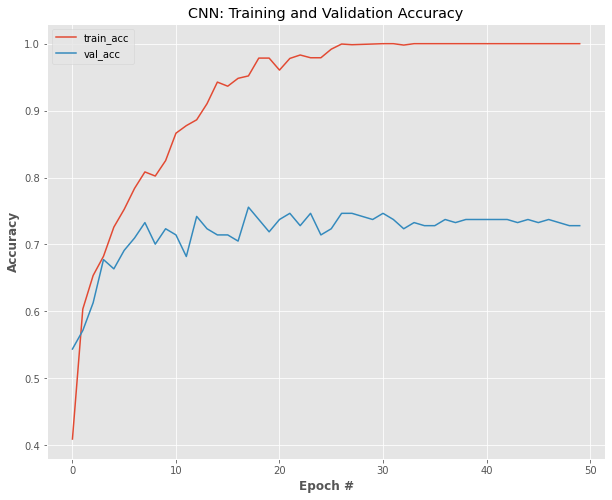

In [114]:
# plot the training and validation accuracy
N = np.arange(0, Epochs)
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("CNN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

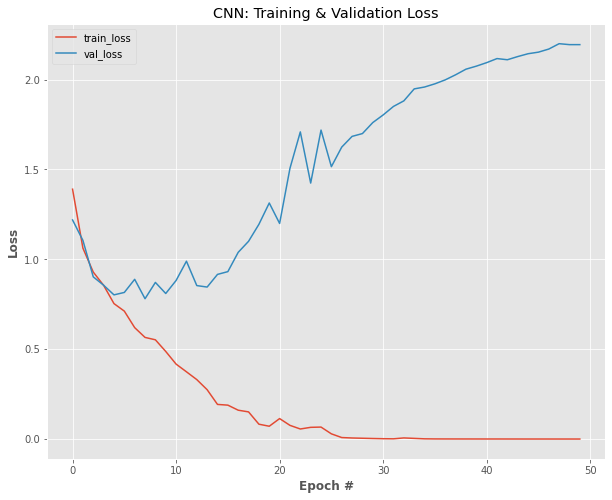

In [115]:
N = np.arange(0, Epochs)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("CNN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

In [116]:
y_pred_prob_model1 = model1.predict(x_test)

In [117]:
y_pred_prob_model1

array([[2.7610055e-05, 1.7406575e-10, 6.4123306e-08, ..., 7.6152524e-08,
        4.2391866e-13, 1.7283460e-03],
       [3.2073294e-05, 3.6058354e-11, 9.6283725e-07, ..., 1.2995490e-07,
        3.0140604e-10, 1.2532433e-05],
       [1.9241591e-09, 1.5347592e-19, 1.8122889e-09, ..., 5.5761830e-05,
        2.5114252e-20, 9.9993539e-01],
       ...,
       [1.7266490e-10, 2.1779269e-14, 2.1523439e-14, ..., 1.9687561e-11,
        2.1609181e-20, 9.9983716e-01],
       [8.8723910e-01, 2.7418265e-12, 2.4619560e-05, ..., 2.9395833e-11,
        4.0607528e-08, 5.5613227e-06],
       [9.0043507e-11, 1.5085646e-16, 1.4989641e-13, ..., 8.8922913e-10,
        1.5352259e-20, 9.9999964e-01]], dtype=float32)

In [118]:
y_pred_model1 = []
for i in y_pred_prob_model1:
    y_pred_model1.append(np.argmax(i))

In [119]:
def model_evaluation(y_test, y_pred):
    print("Cohen Kappa Score: ", cohen_kappa_score(y_test, y_pred))
    print("Classification Report--> \n", classification_report(y_true= y_test, y_pred= y_pred))
    cm =confusion_matrix(y_test, y_pred)
    confusion = pd.DataFrame(cm)
    sns.heatmap(confusion, annot = True, fmt = "d")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.tight_layout()
    plt.show()

Cohen Kappa Score:  0.6354187430589173
Classification Report--> 
               precision    recall  f1-score   support

           0       0.97      0.72      0.82        39
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.73      0.78      0.75        59
           4       0.68      0.72      0.70        53
           6       0.00      0.00      0.00         2
           8       0.69      0.74      0.71        62

    accuracy                           0.73       217
   macro avg       0.44      0.42      0.43       217
weighted avg       0.73      0.73      0.73       217



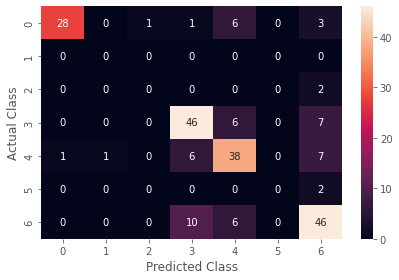

In [120]:
model_evaluation(y_test = y_test, y_pred = y_pred_model1)

## Building the second model

In [156]:
def second_model(width, height, depth, classes):
    inputshape = (height,width, depth)
    if K.image_data_format=="channels_first":
        inputshape = (depth, height, width)
    model = Sequential()
    model.add(Conv2D(20,(3,3), input_shape =inputshape))
    model.add(Conv2D(20,(3,3), input_shape =inputshape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

    model.add(Conv2D(20,(3,3), input_shape =inputshape))
    model.add(Conv2D(50,(3,3), input_shape =inputshape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

    model.add(Conv2D(20,(2,2), input_shape =inputshape))
    model.add(Conv2D(50,(2,2), input_shape =inputshape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))
    
    model.add(Flatten())
    model.add(Dense(units = 500, activation = "relu"))
    model.add(Dense(units = 500, activation = "relu"))
    model.add(Dense(units = 250, activation = "relu", kernel_regularizer= "l1"))
    model.add(Dense(units = classes, activation = "softmax"))

    return model

In [157]:
model2 = second_model(width= 28, height= 28, depth = 3, classes = len(f.unique()))
Epochs = 50
init_lr = 0.001
opt = Adam(lr = init_lr, decay = init_lr/Epochs)
model2.compile(loss = "sparse_categorical_crossentropy", optimizer = opt, metrics = ["accuracy"])

In [158]:
model2.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 26, 26, 20)        560       
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 24, 24, 20)        3620      
_________________________________________________________________
activation_33 (Activation)   (None, 24, 24, 20)        0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 10, 10, 20)        3620      
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 8, 8, 50)          9050      
_________________________________________________________________
activation_34 (Activation)   (None, 8, 8, 50)        

In [159]:
H = model2.fit(x = x_train, y = y_train, validation_data = (x_test, y_test), epochs= Epochs)

Train on 1952 samples, validate on 217 samples
Epoch 1/50
1952/1952 [==============================] - 1s 557us/sample - loss: 29.5837 - accuracy: 0.2777 - val_loss: 9.0044 - val_accuracy: 0.2857
Epoch 2/50
1952/1952 [==============================] - 0s 171us/sample - loss: 3.7267 - accuracy: 0.2695 - val_loss: 2.0206 - val_accuracy: 0.2719
Epoch 3/50
1952/1952 [==============================] - 0s 151us/sample - loss: 1.7293 - accuracy: 0.4129 - val_loss: 1.5443 - val_accuracy: 0.4378
Epoch 4/50
1952/1952 [==============================] - 0s 143us/sample - loss: 1.4142 - accuracy: 0.5312 - val_loss: 1.3128 - val_accuracy: 0.5622
Epoch 5/50
1952/1952 [==============================] - 0s 150us/sample - loss: 1.3056 - accuracy: 0.5702 - val_loss: 1.2735 - val_accuracy: 0.5714
Epoch 6/50
1952/1952 [==============================] - 0s 149us/sample - loss: 1.2191 - accuracy: 0.5968 - val_loss: 1.2788 - val_accuracy: 0.5530
Epoch 7/50
1952/1952 [==============================] - 0s 142us

## Model Evaluation

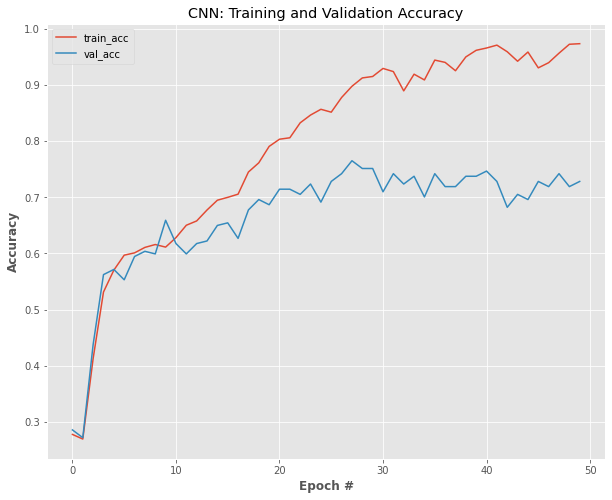

In [160]:
# plot the training and validation accuracy
N = np.arange(0, Epochs)
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("CNN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

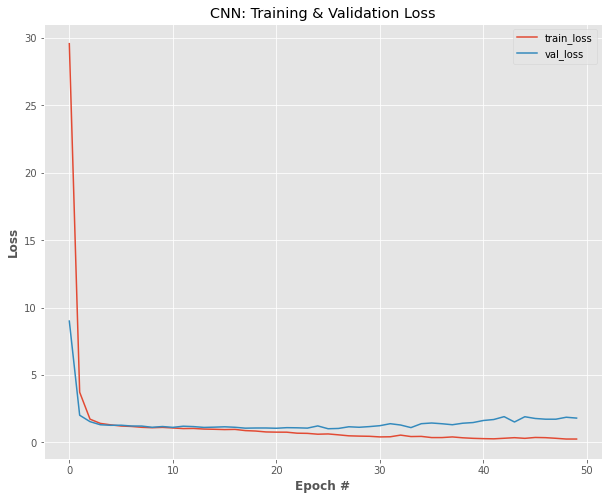

In [161]:
N = np.arange(0, Epochs)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("CNN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

In [148]:
y_pred_prob_model2 = model2.predict(x_test)

In [149]:
y_pred_prob_model2

array([[5.9791007e-03, 4.2819651e-03, 1.1670934e-02, ..., 1.4190081e-02,
        4.5075300e-05, 4.4621000e-01],
       [5.6537714e-02, 1.1103872e-03, 1.7096061e-02, ..., 4.5259483e-04,
        1.6648725e-03, 2.7303945e-02],
       [5.9860791e-03, 4.2814207e-03, 1.1676742e-02, ..., 1.4177535e-02,
        4.5149111e-05, 4.4592315e-01],
       ...,
       [4.5367843e-04, 3.1570308e-03, 2.8926108e-03, ..., 3.9770577e-02,
        1.4301310e-06, 8.3610368e-01],
       [3.8186991e-01, 2.8955258e-04, 1.0965287e-02, ..., 5.9404574e-05,
        6.9325515e-03, 5.9642904e-03],
       [1.8861636e-03, 4.1326853e-03, 6.5895924e-03, ..., 2.6410576e-02,
        9.2611363e-06, 6.8129772e-01]], dtype=float32)

In [162]:
y_pred_model2 = []
for i in y_pred_prob_model1:
    y_pred_model2.append(np.argmax(i))

Cohen Kappa Score:  0.6354187430589173
Classification Report--> 
               precision    recall  f1-score   support

           0       0.97      0.72      0.82        39
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.73      0.78      0.75        59
           4       0.68      0.72      0.70        53
           6       0.00      0.00      0.00         2
           8       0.69      0.74      0.71        62

    accuracy                           0.73       217
   macro avg       0.44      0.42      0.43       217
weighted avg       0.73      0.73      0.73       217



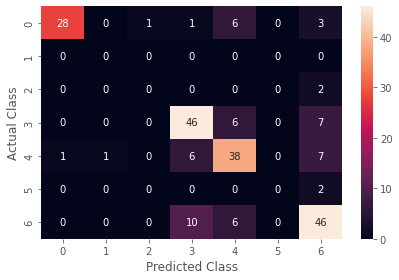

In [163]:
model_evaluation(y_test = y_test, y_pred = y_pred_model2)